## Polynomial Regression Challenge

In [7]:
from functions import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Below, we will generate some synthetic data for this challenge

We have 2 continuous features, `x1` and `x2`, and a binary target `y`

In [2]:
data = generate_data(random_seed= 42)
df = pd.DataFrame(data = data, columns = ['x1', 'x2', 'y'])
print(df.shape)
df.head(3)

(1000, 3)


,x1,x2,y
0,-0.597098,0.896927,1.0
1,0.523172,-0.129884,1.0
2,-0.183970,-1.281665,0.0


<Axes: xlabel='x1', ylabel='x2'>

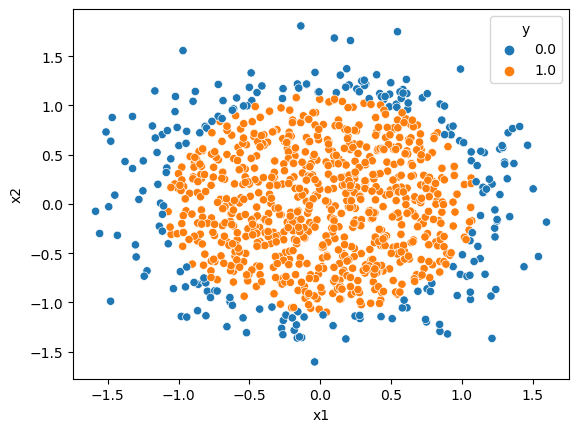

In [3]:
sns.scatterplot(x = df['x1'], y = df['x2'], hue = df['y'])

This is a binary classification problem, so we need to use an appropriate algorithm, like logistic regression. 

Looking at our data, we can see that there does appear to be a clearly defined boundary between the classes (they're not mixed up together).

However, this boundary is clearly not linear, so a basic logistic regression won't work -- we'll need to introduce polynomial features to capture this trend!

>*Note*: There are non-linear models you will encounter soon that could capture this boundary without polynomial features (i.e. a tree based model), but for now we will focus on logistic regression

### Task 1: Data Exploration

We've already looked at the relationship between the features and the target in the visualization above, but lets do some basic QA to ensure our data is suitable for modelling.

1. Look at the descriptive statistics (mean, std dev, quantiles, min, max, etc) for the variables at the target
2. Check if there are any missing values
3. Do some more EDA visualization:
    - Visualize the distribution of each variable (i.e. a histogram for continuous features, a bar plot for the target)
    - Try creating an overlapped histogram of the features to compare their histograms (hint: create two seaborn plots in the same cell, use the `alpha` parameter for transparency)
4. Look at the histograms of x1 and x2
    - Do these look like a familiar distribution? Can you perform a statistical test to check? Assume $\alpha = 0.05$

> Think ahead to your ML modelling:
> Do you think feature scaling is a necessary step here? What is the purpose of feature scaling? Make a decision whether or not to include it in your modelling
    

In [5]:
# Get descriptive statistics for all columns
print(df.describe())

                x1           x2            y
count  1000.000000  1000.000000  1000.000000
mean      0.021836     0.011643     0.773000
std       0.629175     0.636919     0.419102
min      -1.586814    -1.603269     0.000000
25%      -0.464612    -0.488465     1.000000
50%       0.045429     0.014262     1.000000
75%       0.499372     0.506822     1.000000
max       1.598469     1.806975     1.000000


In [6]:
# Check for missing values in all columns
print(df.isnull().sum())

x1    0
x2    0
y     0
dtype: int64


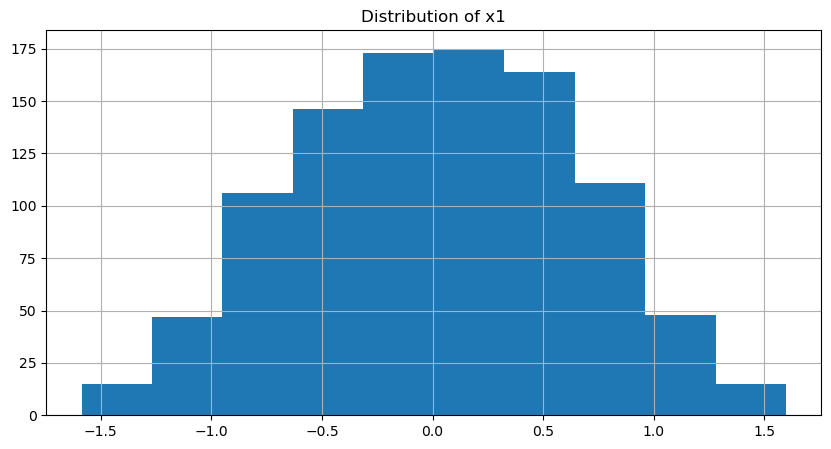

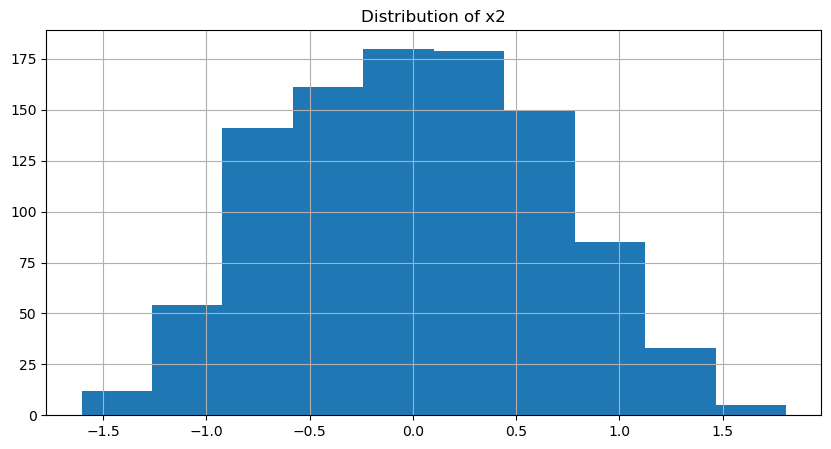

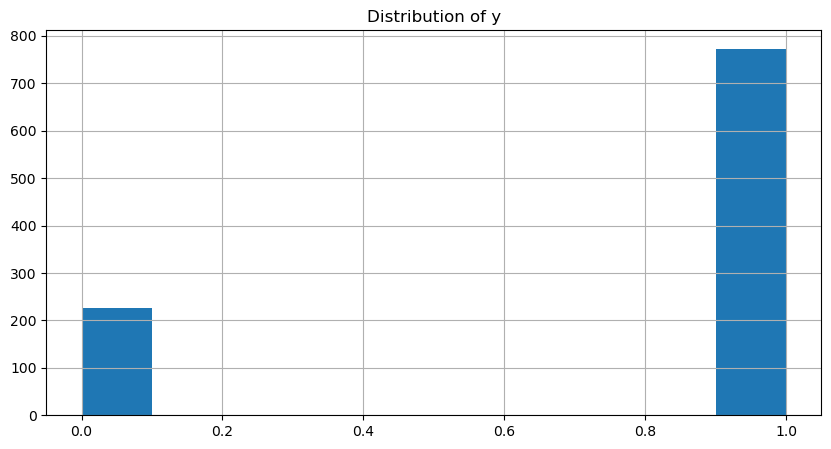

c:\Users\16476\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\16476\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


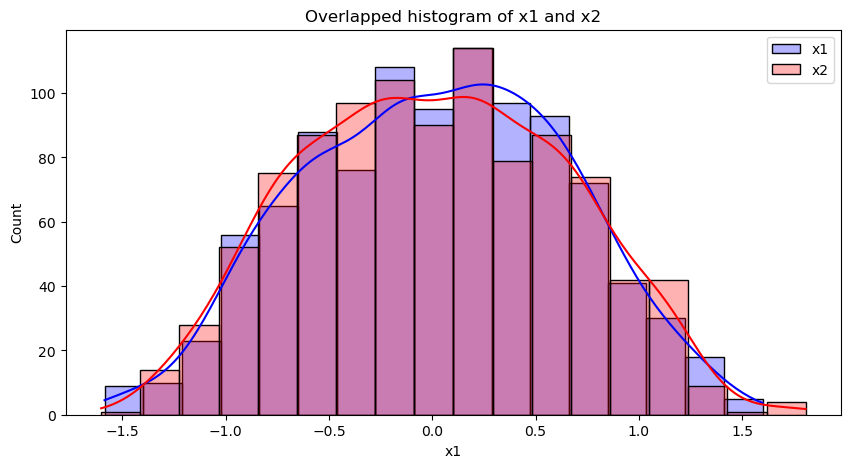

In [10]:
# Visualize the distribution of each variable
for column in df.columns:
    plt.figure(figsize=(10, 5))
    if df[column].dtype == 'object':
        # If the column is categorical, use a bar plot
        sns.scatterplot(df[column])
    else:
        # If the column is numerical, use a histogram
        df[column].hist()
    plt.title(f'Distribution of {column}')
    plt.show()

# Overlapped histogram of the features
plt.figure(figsize=(10, 5))
sns.histplot(df['x1'], color='blue', kde=True, alpha=0.3, label='x1')
sns.histplot(df['x2'], color='red', kde=True, alpha=0.3, label='x2')
plt.title('Overlapped histogram of x1 and x2')
plt.legend()
plt.show()

### Task 2: Modelling 

1. Perform a train test split on the data 
    - Remember that higher order polynomials will almost always have lower training error due to overfitting
    - We will use evaluation on the test set to decide the best model fit

In [11]:
from sklearn.model_selection import train_test_split

# Define the features and the target
X = df[['x1', 'x2']]
y = df['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2. Select an evaluation criterion
    - Our target is imbalanced, is it appropriate to use accuracy?
    - We want an overall good fit, not biased towards false positives or false negatives. Are recall/ precision appropriate?
    - What about one of the 'balanced' criteria for imbalanced data sets?

When dealing with imbalanced datasets, accuracy is not a good metric because it can be misleading. Models could simply predict the majority class in all instances and achieve a high accuracy rate.

Precision and recall are more useful than accuracy in such cases. However, if I want an overall good fit not biased towards false positives or false negatives, I might want to consider the F1 score, which is the harmonic mean of precision and recall.

Another good metric for imbalanced datasets is the Area Under the Receiver Operating Characteristic Curve (AUC-ROC). It tells us about the model's ability to distinguish between the classes.

For extremely imbalanced datasets, I might want to consider using metrics that are specifically designed for imbalanced datasets, such as the Balanced Accuracy, the Matthews Correlation Coefficient (MCC), or the Kappa statistic.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef, cohen_kappa_score

# Assuming y_test are the true labels and y_pred are the predicted labels
y_pred = model.predict(X_test)  # replace 'model' with your actual model

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))
print('AUC-ROC:', roc_auc_score(y_test, y_pred))
print('Balanced Accuracy:', balanced_accuracy_score(y_test, y_pred))
print('Matthews Correlation Coefficient:', matthews_corrcoef(y_test, y_pred))
print('Kappa statistic:', cohen_kappa_score(y_test, y_pred))

3. Try a simple logistic regression:
    - We don't expect this to work well, because no straight line can create the correct decision boundary 
    - This will act as our baseline

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        40
         1.0       0.80      1.00      0.89       160

    accuracy                           0.80       200
   macro avg       0.40      0.50      0.44       200
weighted avg       0.64      0.80      0.71       200



c:\Users\16476\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\16476\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\16476\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The classification report provides key metrics in assessing the performance of the classification model. Interpretation of results:

- For class 0.0:
  - Precision is 0.00: This means that the model didn't correctly predict any of the actual class 0 instances. It's the ratio of correctly predicted positive observations to the total predicted positives.
  - Recall is 0.00: This means that the model didn't correctly predict any of the actual class 0 instances. It's the ratio of correctly predicted positive observations to the all observations in actual class.
  - F1-score is 0.00: The F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. It's suitable for uneven class distribution problems.

- For class 1.0:
  - Precision is 0.80: This means that 80% of the instances that the model predicted as class 1 were actually class 1.
  - Recall is 1.00: This means that the model correctly predicted all of the actual class 1 instances.
  - F1-score is 0.89: This is a weighted average of precision and recall for class 1, and it's quite high, which is good.

- Overall:
  - Accuracy is 0.80: This means that the model correctly predicted 80% of all instances. However, given the imbalance in the classes, this metric can be misleading.
  - Macro avg F1-score is 0.44: This is the average F1-score of both classes. It's low because the F1-score for class 0 is 0.
  - Weighted avg F1-score is 0.71: This is the average F1-score of both classes, but giving a weight to each class according to the number of instances of the class in the data. It's higher than the macro average because class 1, which has a high F1-score, has more instances than class 0.

The model is performing well in predicting class 1 but failing to predict class 0. This is a common problem when dealing with imbalanced datasets. I might want to consider using techniques to handle imbalanced data, such as oversampling the minority class, undersampling the majority class, or using a different algorithm that's more suitable for imbalanced data.

4. Write a function that computes your chosen metric for different degrees of PolynomialFeatures
    - Inputs should be your dataframes, and the maximum polynomial degree
    - For each degree from 1 to your max degree, fit a logistic regression model
        - (HINT: use `for i in range(1, max+1):`)
    - For each degree, print the degree, and the score for your chosen metric
    - The function should return the fitted model with the highest score

In [17]:
from sklearn.metrics import f1_score, balanced_accuracy_score, matthews_corrcoef, cohen_kappa_score

def compute_metrics(X_train, y_train, X_test, y_test, max_degree):
    best_f1_score = 0
    best_degree = 0
    best_model = None

    for i in range(1, max_degree + 1):
        # Create a pipeline with polynomial features and logistic regression
        model = make_pipeline(PolynomialFeatures(degree=i), LogisticRegression())

        # Fit the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Compute the metrics
        f1 = f1_score(y_test, y_pred)
        balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
        mcc = matthews_corrcoef(y_test, y_pred)
        kappa = cohen_kappa_score(y_test, y_pred)

        # Print the degree and the metrics
        print('Degree:', i)
        print('F1 Score:', f1)
        print('Balanced Accuracy:', balanced_accuracy)
        print('Matthews Correlation Coefficient:', mcc)
        print('Kappa statistic:', kappa)
        print('---')

        # If the F1 score is better than the current best F1 score, update the best F1 score, best degree, and best model
        if f1 > best_f1_score:
            best_f1_score = f1
            best_degree = i
            best_model = model

    # Print the best degree and the best F1 score
    print('Best Degree:', best_degree, 'Best F1 Score:', best_f1_score)

    # Return the best model
    return best_model

In [18]:
best_model = compute_metrics(X_train, y_train, X_test, y_test, max_degree=5)

Degree: 1
F1 Score: 0.8888888888888888
Balanced Accuracy: 0.5
Matthews Correlation Coefficient: 0.0
Kappa statistic: 0.0
---
Degree: 2
F1 Score: 0.9937888198757764
Balanced Accuracy: 0.975
Matthews Correlation Coefficient: 0.9686442096757053
Kappa statistic: 0.9681528662420382
---
Degree: 3
F1 Score: 0.9937888198757764
Balanced Accuracy: 0.975
Matthews Correlation Coefficient: 0.9686442096757053
Kappa statistic: 0.9681528662420382
---
Degree: 4
F1 Score: 0.9846153846153847
Balanced Accuracy: 0.9375
Matthews Correlation Coefficient: 0.9211323729436766
Kappa statistic: 0.9180327868852459
---
Degree: 5
F1 Score: 0.9846153846153847
Balanced Accuracy: 0.9375
Matthews Correlation Coefficient: 0.9211323729436766
Kappa statistic: 0.9180327868852459
---
Best Degree: 2 Best F1 Score: 0.9937888198757764


> (STRETCH): There is a more elegant way to do this using sklearn Pipelines, which you will learn later. Optionally, research using pipelines to tune hyperparameters like the degree parameter of PolynomialFeatures. See if you get the same result as your function 

### Task 3: Interpretation

We have created a function for you to visualize the decision boundary created by your model. We already imported it at the top of this notebook.

The function call looks like `plot_boundaries(X, y, degree)`, where X is your features dataframe (i.e. X_train), your target series (i.e. y_train), and degree is the integer of the maximum polynomial degree

1. Experiment with this function with different polynomial degrees
    - What is the smallest degree that seems to effectively capture the decision boundary?
    - Does this match with your findings from the modelling step?

2. Look up the mathematical function to define a circle - we can consider this the underlying 'data generating function'
    - Is this the same degree as your best model fit?
    - Consider, in general, does it make sense to use a higher order polynomial than that which captures the actual physical process?

### Task 4: The Right Tool for the Job

Some models naturally do a better job at some tasks than others. Once we are familiar with more models, we can use our intuition as data scientists to choose the right tool for the job. 

k-Nearest Neighbors Classifier is a very simple model that considers the `k` closest examples to the prediction target in the feature space (by euclidean distance), and takes the 'vote' of these neighboring examples to make a prediction. So if 3 neighbors were class 1 and 2 were class 0, we would predict class 1 (with a probability of $\frac{3}{5}$)

(Note: k-NN can also be a regressor, where the values of the neighboring examples are simply averaged)

Unlike logisitic regression, k-NN does not model any particular mathematical function. It is a [non-parametric model](https://en.wikipedia.org/wiki/Nonparametric_statistics#:~:text=Non%2Dparametric%20models%20differ%20from,and%20not%20fixed%20in%20advance.) without a specified structure, and so can potentially fit complex decision boundaries, despite its simplicity. 

1. Try using our previous plotting function with the added argument `modeltype = 'knn'`. This model is much simpler than engineering polynomial features - does it still capture our decision boundary effectively?

> Note: If you want to investigate more with k-NN there is a `neighbors` argument in the function. By default it is set to 1.
